In [19]:
import numpy as np
from stacking_fmri import stacking_CV_fmri, stacking_fmri
from ridge_tools import R2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Set up or load features

N_sample = 1000
dim_X1 = 50
dim_X2 = 100
dim_X3 = 25

X1 = np.random.randn(N_sample, dim_X1)
X2 = np.random.randn(N_sample, dim_X2)
X3 = np.random.randn(N_sample, dim_X3)

#X1 = np.load('....')

In [32]:
### Set up or load brain data (fMRI, EEG, ....)

dim_Y = 10

# Y = np.random.randn(N_sample, dim_Y)
Y = 0.3 * X1.dot(np.random.randn(dim_X1, dim_Y)) + \
    0.3 * X2.dot(np.random.randn(dim_X2, dim_Y)) + \
    0.4 * X3.dot(np.random.randn(dim_X3, dim_Y))

#Y = np.load('....')

In [33]:
### Run stacking using multiple features (Xs) and Y


## with the outermost cross-validation
r2s, stacked_r2s, _, _, _, S_average = stacking_CV_fmri(Y, [X1,X2,X3], method = 'cross_val_ridge',n_folds = 4,score_f=R2)

## simple train-test setting (without the outermost cross-validation)
# r2s, stacked_r2s, _, _, _, S_average = stacking_fmri(Y[0:700], Y[700:], [X1[0:700],X2[0:700],X3[0:700]], [X1[700:],X2[700:],X3[700:]], method = 'cross_val_ridge',score_f=R2)

(3, 250)
(3, 250)
(3, 250)
(3, 250)


In [34]:
### Results

## r2s: voxelwise R2(predictions using only one feature, data)
print('shape of r2s is (number of features, dim_Y), that is', r2s.shape)

## stacked_r2s: voxelwise R2(stacking predictions using all features, data)
print('shape of stacked_r2s is (dim_Y, ), that is', stacked_r2s.shape)

## S_average: optimzed voxelwise stacking weights showing how different features are combined
print('shape of S_average is (dim_Y, num of features), that is', S_average.shape)



shape of r2s is (number of features, dim_Y), that is (3, 10)
shape of stacked_r2s is (dim_Y, ), that is (10,)
shape of S_average is (dim_Y, num of features), that is (10, 3)


Text(0.5, 1.0, 'Prediction Performance')

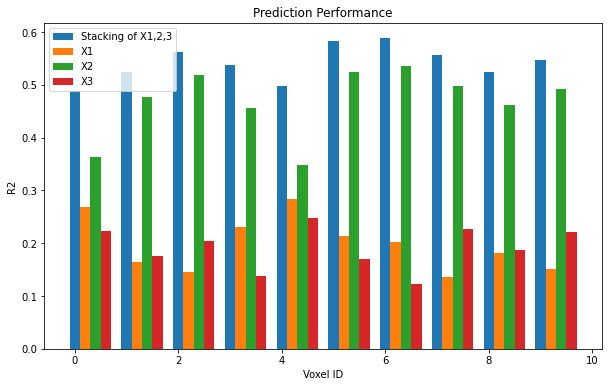

In [37]:
plt.figure(figsize=(10,6))

bar_width = 0.2
index_0 = np.arange(dim_Y)
index_1 = index_0 + bar_width
index_2 = index_1 + bar_width
index_3 = index_2 + bar_width


plt.bar(index_0, stacked_r2s, width=bar_width, label='Stacking of X1,2,3')
plt.bar(index_1, r2s[0,:], width=bar_width, label='X1')
plt.bar(index_2, r2s[1,:], width=bar_width, label='X2')
plt.bar(index_3, r2s[2,:], width=bar_width, label='X3')
plt.legend()
plt.xlabel('Voxel ID')
plt.ylabel('R2')
plt.title('Prediction Performance')

([<matplotlib.axis.YTick at 0x7fd499373150>,
 [Text(0, 0.5, 'X1'), Text(0, 1.5, 'X2'), Text(0, 2.5, 'X3')])

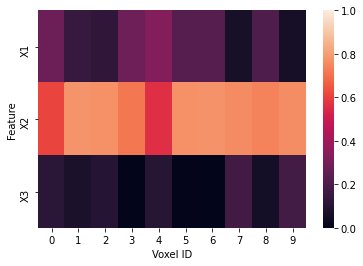

In [45]:
sns.heatmap(S_average.T, vmin=0, vmax=1)
plt.xlabel('Voxel ID')
plt.ylabel('Feature')
plt.yticks([0.5,1.5,2.5],['X1', 'X2', 'X3'])